# ISLR Chapter 3 - End of Chapter Applied exercises code portion solutions

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions in Python by Arthur Avila

### 8. This question involves the use of simple linear regression on the `Auto` data set.  

####  (a) Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output. For example:  
  
    i. Is there a relationship between the predictor and the response?  
    ii. How strong is the relationship between the predictor and the response?  
    iii. Is the relationship between the predictor and the response positive or negative?  
    iv. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95% confidence and prediction intervals?

In [1]:
auto = read.table('Auto.data', na.strings='?', header=T)

print(summary(model <- lm(mpg~horsepower, data = auto)))

cat('\n\nParameters:\n', coef(model))

cat('\n\nConfidence interval\n')
print(predict(model, data.frame(horsepower=98), interval='confidence'))
cat('\nPrediction interval\n')
print(predict(model, data.frame(horsepower=98), interval='predict'))
#print('\n\nConfidence(mean) and Prediction intervals\n',predictions.summary_frame(alpha=0.05))



Call:
lm(formula = mpg ~ horsepower, data = auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16



Parameters:
 39.93586 -0.1578447

Confidence interval
       fit      lwr      upr
1 24.46708 23.97308 24.96108

Prediction interval
       fit     lwr      upr
1 24.46708 14.8094 34.12476


#### (b) Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

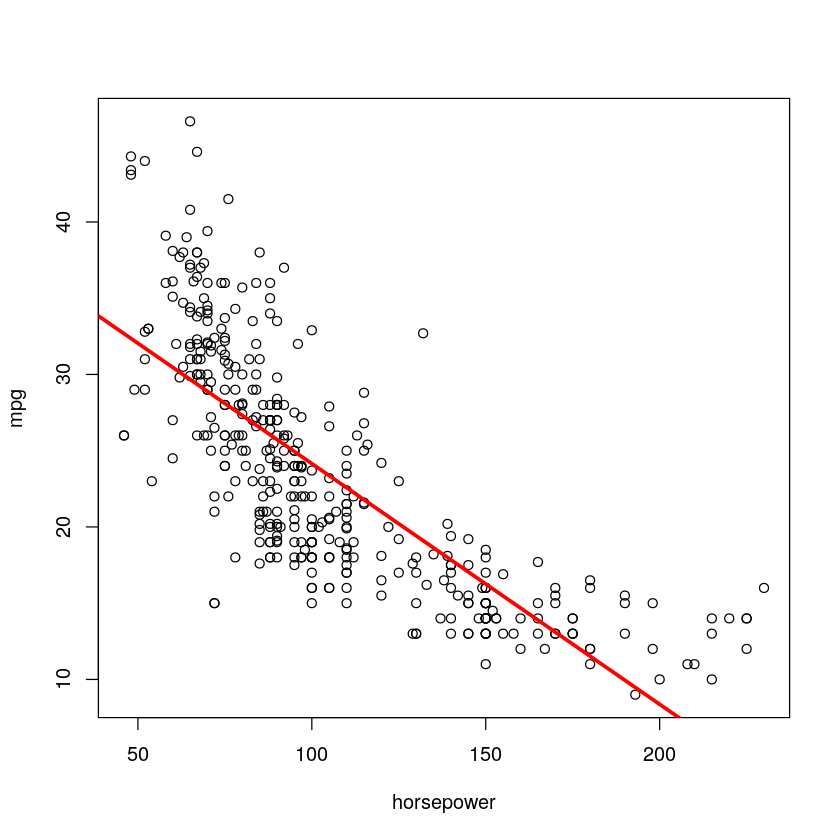

In [2]:
plot(mpg~horsepower, data=auto)
abline(model, lwd=3, col='red')

#### (c) Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

[1] "Clearly the wrong functional form for the model."


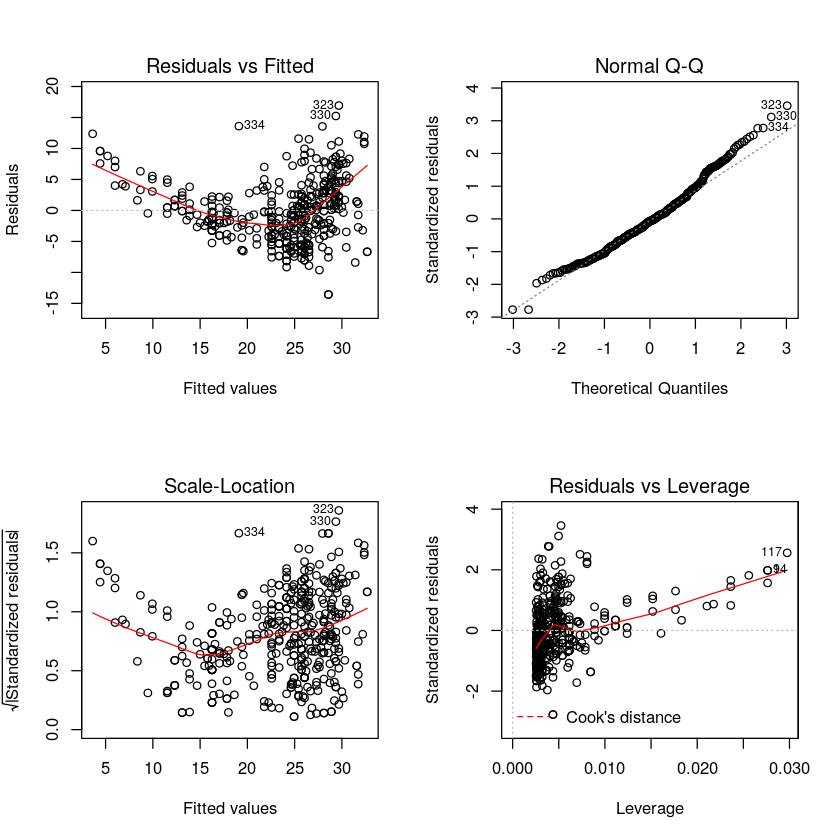

In [3]:
par(mfrow=c(2,2))
plot(model)
print('Clearly the wrong functional form for the model.')

### 9. This question involves the use of multiple linear regression on the `Auto` data set.  
####  (a) Produce a scatterplot matrix which includes all of the variables in the data set.

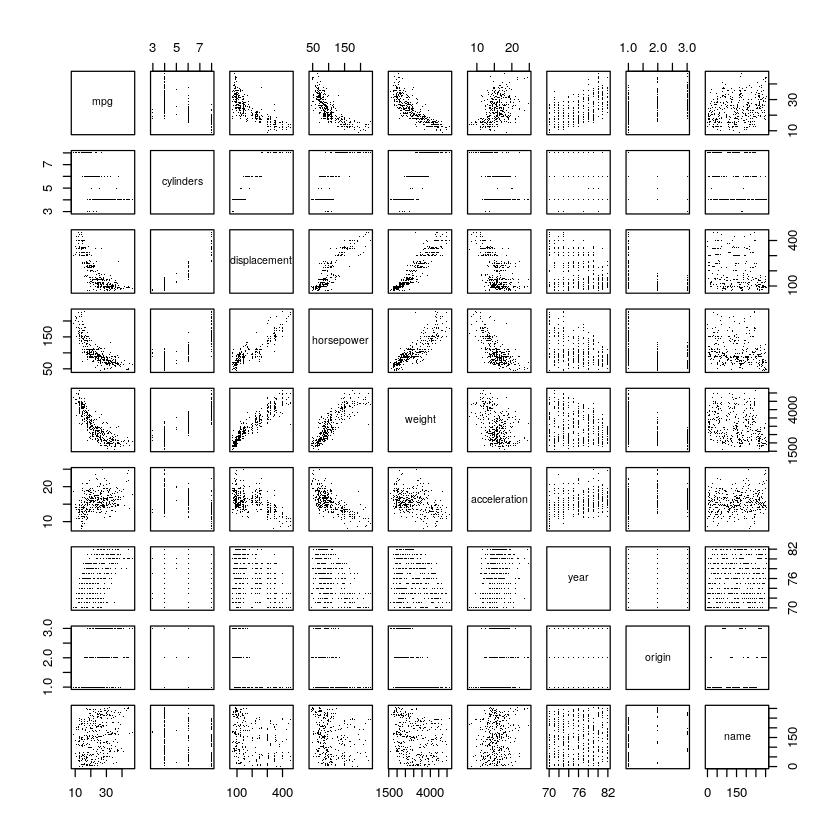

In [4]:
pairs(auto, pch='.')

####  (b) Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the name variable, which is qualitative.  

In [5]:
#cor(auto[,-c('name')])
anum <- names(auto)!='name'
cor(auto[anum], use='complete.obs')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


####  (c) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except name as the predictors. Use the `summary()` function to print the results. Comment on the output. For instance:  
    i. Is there a relationship between the predictors and the response?  
    ii. Which predictors appear to have a statistically significant relationship to the response?  
    iii. What does the coefficient for the `year` variable suggest?  

In [6]:
summary(model2<-lm(mpg~.-name, data = auto))


Call:
lm(formula = mpg ~ . - name, data = auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


####  (d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?  

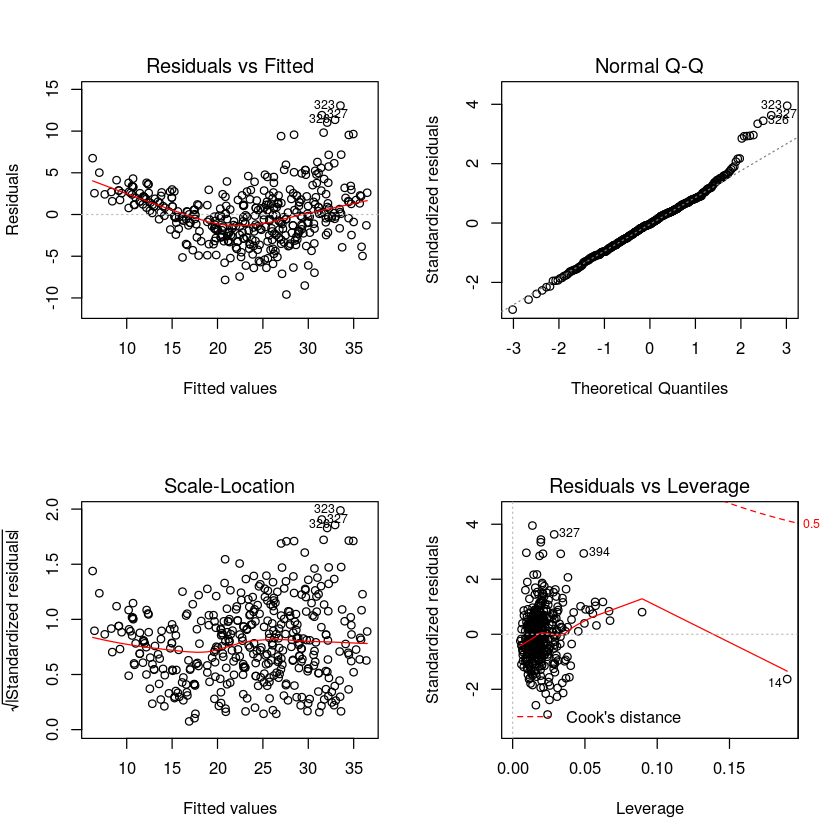

In [7]:
par(mfrow=c(2,2))
plot(model2)

####  (e) Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?  

In [8]:
#cat(paste0(names(auto),sep=' +'))
summary(lm(mpg ~ (cylinders + displacement + horsepower + weight + acceleration + year + origin)^2,
          data=auto))


Call:
lm(formula = mpg ~ (cylinders + displacement + horsepower + weight + 
    acceleration + year + origin)^2, data = auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6303 -1.4481  0.0596  1.2739 11.1386 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                3.548e+01  5.314e+01   0.668  0.50475   
cylinders                  6.989e+00  8.248e+00   0.847  0.39738   
displacement              -4.785e-01  1.894e-01  -2.527  0.01192 * 
horsepower                 5.034e-01  3.470e-01   1.451  0.14769   
weight                     4.133e-03  1.759e-02   0.235  0.81442   
acceleration              -5.859e+00  2.174e+00  -2.696  0.00735 **
year                       6.974e-01  6.097e-01   1.144  0.25340   
origin                    -2.090e+01  7.097e+00  -2.944  0.00345 **
cylinders:displacement    -3.383e-03  6.455e-03  -0.524  0.60051   
cylinders:horsepower       1.161e-02  2.420e-02   0.480  0.63157   
cylinders:weight

####  (f) Try a few different transformations of the variables, such as $\log(X)$, $\sqrt X$, $X^2$. Comment on your findings.

Loading required package: car
Loading required package: carData



Call:
lm(formula = sqrt(mpg) ~ displacement + horsepower + weight + 
    acceleration + origin + post79 + displacement:horsepower + 
    displacement:weight + displacement:acceleration + displacement:origin + 
    displacement:post79 + horsepower:weight + horsepower:acceleration + 
    horsepower:post79 + weight:origin + weight:post79 + acceleration:origin + 
    acceleration:post79 + origin:post79, data = auto2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80281 -0.14860 -0.00785  0.16745  1.19636 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                9.445e+00  6.401e-01  14.754  < 2e-16 ***
displacement              -2.513e-02  3.728e-03  -6.740 6.15e-11 ***
horsepower                 8.456e-03  8.375e-03   1.010 0.313338    
weight                    -2.004e-04  2.121e-04  -0.945 0.345282    
acceleration              -1.234e-01  3.007e-02  -4.103 5.03e-05 ***
origin2                   -1.793e+00  3.821e-01  

,GVIF,Df,GVIF^(1/(2*Df))
displacement,776.205569,1,27.860466
horsepower,530.108739,1,23.024090
weight,165.533427,1,12.865979
acceleration,35.102742,1,5.924757
origin,27124.000752,2,12.833303
post79,206.395007,1,14.366454
displacement:horsepower,386.887679,1,19.669461
displacement:weight,484.804229,1,22.018270
displacement:acceleration,210.300752,1,14.501750
displacement:origin,8269.928182,2,9.536202


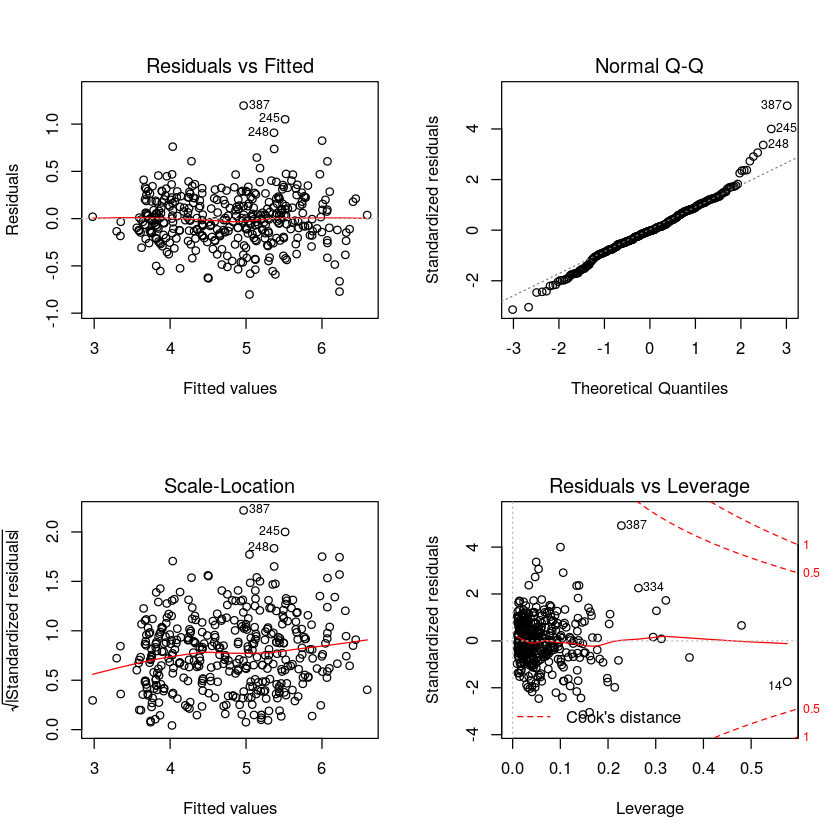

In [9]:
require(car)
auto2 = within(auto,{
    origin <- as.factor(origin)
    post79 <- year > 79
})
model3<-lm(sqrt(mpg) ~ 
        (displacement + horsepower + weight + acceleration + origin +post79)^2,
        data = auto2)
par(mfrow=c(2,2))
summary(m<-step(model3, trace=0))
vif(m)
plot(m)

### 10. This question should be answered using the `Carseats` data set.
#### (a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban` , and `US`.

Loading required package: ISLR


'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes



Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


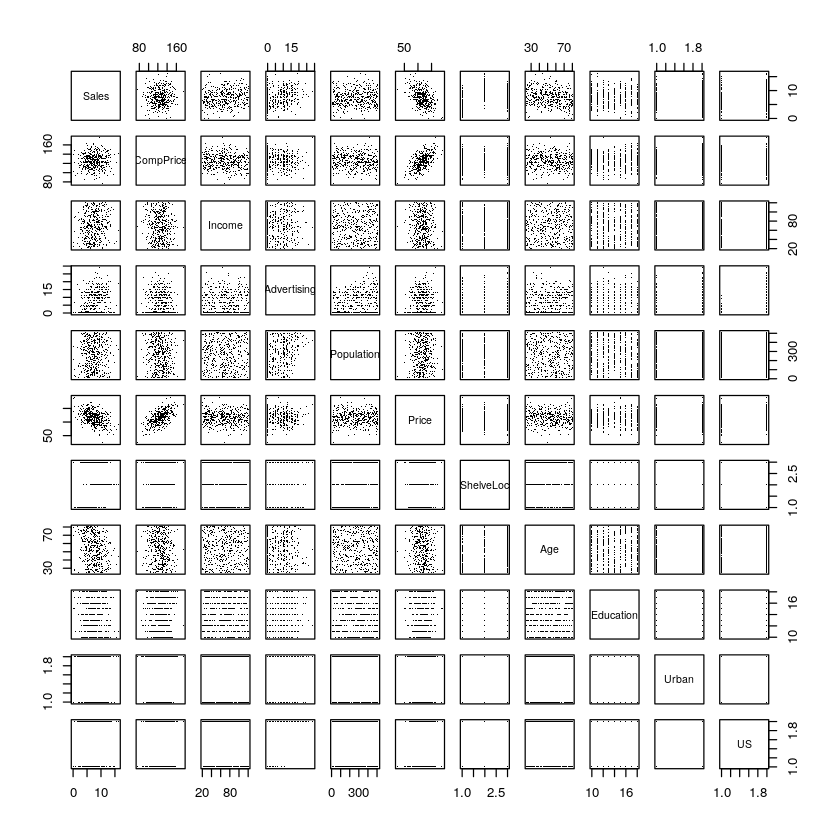

In [10]:
require(ISLR)
str(Carseats)
head(Carseats)
pairs(Carseats, pch='.')
summary(model <- lm(Sales ~ Price + Urban + US, data = Carseats))

#### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

Price: Marginal change on sales for a unit increase in Price.  
Urban/US: Intercept change from changing status 'No' to 'Yes'.

#### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

\begin{equation}
Sales_t = 
    \begin{cases} 
        \beta_0 + \beta_1~Price_t + \varepsilon_t 
            & \quad \text{if} \quad (Urban, US) = (\text{'No'} , \text{'No'}) \\
        (\beta_0 + \beta_2) + \beta_1~Price_t + \varepsilon_t 
            & \quad \text{if} \quad (Urban, US) = (\text{'Yes'} , \text{'No'}) \\
        (\beta_0 + \beta_3) + \beta_1~Price_t + \varepsilon_t 
            & \quad \text{if} \quad (Urban, US) = (\text{'No'} , \text{'Yes'}) \\
        (\beta_0 + \beta_2 + \beta_3) + \beta_1~Price_t + \varepsilon_t 
            & \quad \text{if} \quad (Urban, US) = (\text{'Yes'} , \text{'Yes'})
    \end{cases}
\end{equation}

#### (d) For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?
At $\alpha=0.05$ we reject all but $\beta_2 = 0$.

#### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [11]:
summary(model2 <- lm(Sales ~ Price + US, data = Carseats))


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


#### (f) How well do the models in (a) and (e) fit the data?

Loading required package: olsrr
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘olsrr’

The following object is masked _by_ ‘.GlobalEnv’:

    auto

The following object is masked from ‘package:datasets’:

    rivers



-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.998          0.9184 
Kolmogorov-Smirnov        0.0217         0.9919 
Cramer-von Mises         27.2959         0.0000 
Anderson-Darling          0.1988         0.8855 
-----------------------------------------------


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

              Data                
 ---------------------------------
 Response : Sales 
 Variables: fitted values of Sales 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    1.520578 
 Prob > Chi2   =    0.2175321 

Residuals don't seem to violate OLS assumptions.
The model explains 23.93% of the variation on Sales

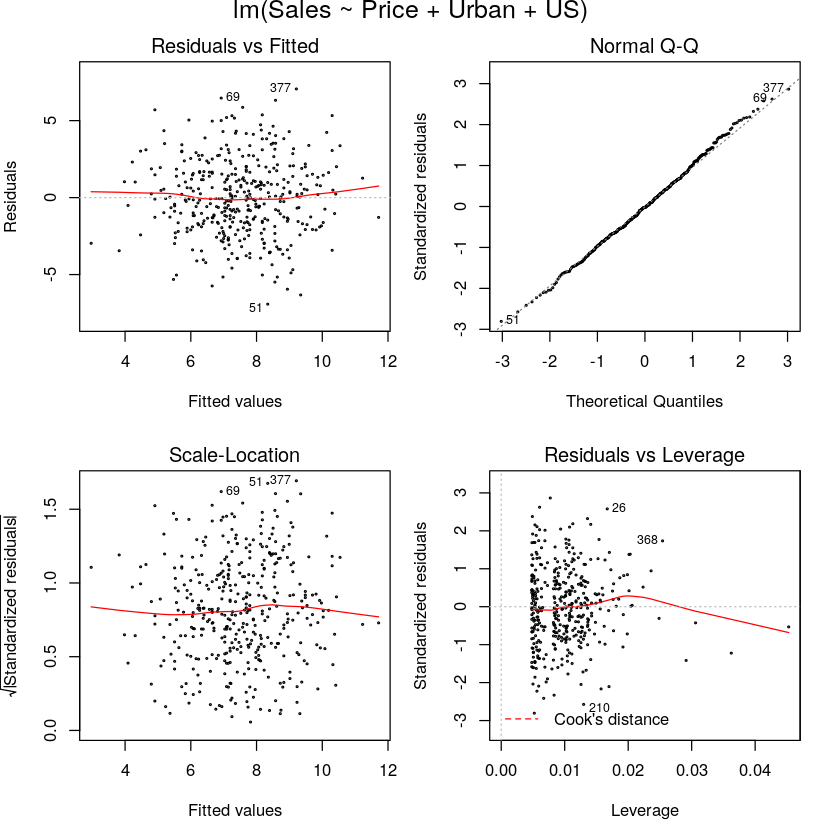

In [12]:
require(olsrr)
par(mfrow=c(2,2), oma=c(0,0,1.1,1), mar=c(5,4,2,1))
plot(model, cex=0.25)
par(mfrow=c(1,1))

ols_test_normality(model)
ols_test_breusch_pagan(model)
cat("Residuals don't seem to violate OLS assumptions.\n")
cat(paste0('The model explains ',
          round(summary(model)$r.squared*100,2),
          '% of the variation on Sales'))

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.998          0.9199 
Kolmogorov-Smirnov        0.0208         0.9951 
Cramer-von Mises         27.2504         0.0000 
Anderson-Darling          0.1965         0.8888 
-----------------------------------------------


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

              Data                
 ---------------------------------
 Response : Sales 
 Variables: fitted values of Sales 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    1.566777 
 Prob > Chi2   =    0.2106757 

Residuals don't seem to violate OLS assumptions.
The model explains 23.93% of the variation on Sales

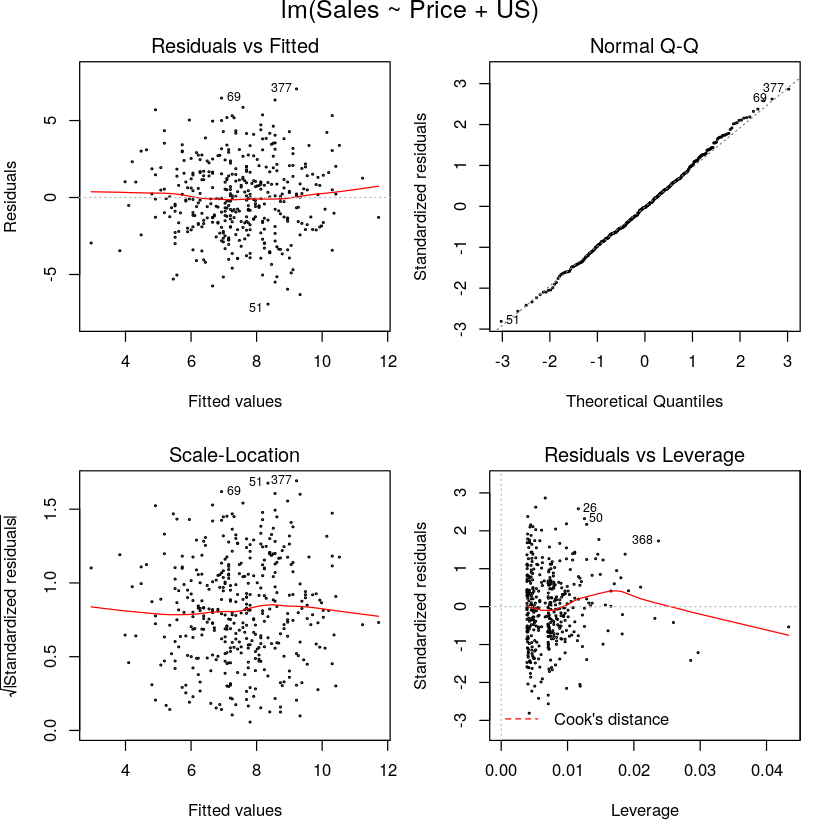

In [13]:
par(mfrow=c(2,2), oma=c(0,0,1.1,1), mar=c(5,4,2,1))
plot(model2, cex=0.25)
ols_test_normality(model2)
ols_test_breusch_pagan(model2)
cat("Residuals don't seem to violate OLS assumptions.\n")
cat(paste0('The model explains ',
          round(summary(model2)$r.squared*100,2),
          '% of the variation on Sales'))

#### (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [14]:
confint(model2)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


#### (h) Is there evidence of outliers or high leverage observations in the model from (e)?

In [15]:
stresid = rstandard(model2)
outl = stresid > 2
xtout = stresid >3
hat = influence(model2)$hat
leverage = hat > 2*model2$rank/length(hat)
cat(paste('There are',sum(outl), 'outliers,',
          sum(xtout), 'extreme outliers, and',
          sum(leverage),'leverage points.\nThere are', 
          sum(outl*leverage), 'likely influential points, both high residual and leverage.'))


There are 13 outliers, 0 extreme outliers, and 20 leverage points.
There are 0 likely influential points, both high residual and leverage.

### 11. In this problem we will investigate the t-statistic for the null hypothesis $H_0 : \beta = 0$ in simple linear regression without an intercept. To begin, we generate a predictor `x` and a response `y` as follows.

```
> set.seed(1)
> x = rnorm(100)
> y = 2*x+rnorm(100)
```

In [16]:
set.seed(1)
x = rnorm(100)
y = 2*x+rnorm(100)

#### (a) Perform a simple linear regression of y onto x , without an intercept. Report the coefficient estimate $\hat\beta$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results. (You can perform regression without an intercept using the command `lm(y∼x+0)`.)

In [17]:
model = lm(y~x-1)
summary(model)


Call:
lm(formula = y ~ x - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9154 -0.6472 -0.1771  0.5056  2.3109 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   1.9939     0.1065   18.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9586 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


#### (b) Now perform a simple linear regression of `x` onto `y` without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.

In [18]:
model2 = lm(x~y-1)
summary(model2)


Call:
lm(formula = x ~ y - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8699 -0.2368  0.1030  0.2858  0.8938 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
y  0.39111    0.02089   18.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4246 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


#### (c) What is the relationship between the results obtained in (a) and (b)?

t-value, R-squared, and F-statistic are the same. Coefficients are not the inverse of each other (minimize SSR on vertical distance, not Euclidian distance). 

#### (d) For the regression of $Y$ onto $X$ without an intercept, the t-statistic for $H_0 : \beta = 0$ takes the form $\hat\beta/SE(\hat\beta)$, where $\hat\beta$ is given by (3.38), and where
$$
SE(\hat\beta)=\sqrt{\frac{\sum_{i=1}^{n}(y_i-x_i\hat\beta)^2}{(n-1)\sum_{i'=1}^{n}x_{i'}^2}}.
$$
#### (These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in `R` , that the t-statistic can be written as
$$
\frac{\sqrt{n-1}\sum_{i=1}^nx_iy_i}
     {\sqrt{(\sum_{i=1}^nx_i^2)(\sum_{i=1}^ny_i^2)-(\sum_{i=1}^nx_iy_i)^2}}.
$$

\begin{align}
\hat\beta &= \frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}\\
SE(\hat\beta)&=\sqrt{\frac{\sum_{i=1}^{n}(y_i-x_i\hat\beta)^2}{(n-1)\sum_{i=1}^{n}x_i^2}}
             =\sqrt{\frac{\sum_{i=1}^{n}y_i^2+\hat\beta^2\sum_{i=1}^{n}x_i^2 -2\hat\beta\sum_{i=1}^{n}x_iy_i}{(n-1)\sum_{i=1}^{n}x_i^2}}\\
SE(\hat\beta)&=\sqrt{\frac{\sum_{i=1}^{n}y_i^2+\left(\frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}\right)^2\sum_{i=1}^{n}x_i^2 -2\left(\frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}\right)\sum_{i=1}^{n}x_iy_i}{(n-1)\sum_{i=1}^{n}x_i^2}}\\
SE(\hat\beta)&=\sqrt{\frac{\left(\sum_{i=1}^{n}y_i^2\right)\left(\sum_{i=1}^{n}x_i^2\right)+\left(\sum_{i=1}^nx_iy_i\right)^2 -2\left(\sum_{i=1}^nx_iy_i\right)^2}{(n-1)\left(\sum_{i=1}^{n}x_i^2\right)^2}}\\
SE(\hat\beta)&=\sqrt{\frac{\left(\sum_{i=1}^{n}y_i^2\right)\left(\sum_{i=1}^{n}x_i^2\right)-\left(\sum_{i=1}^nx_iy_i\right)^2}{(n-1)\left(\sum_{i=1}^{n}x_i^2\right)^2}}\\
\frac{\hat\beta}{SE(\hat\beta)}&=\sqrt{\frac{(n-1)\left(\sum_{i=1}^{n}x_i^2\right)^2}{\left(\sum_{i=1}^{n}y_i^2\right)\left(\sum_{i=1}^{n}x_i^2\right)-\left(\sum_{i=1}^nx_iy_i\right)^2}}\frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}\\
\frac{\hat\beta}{SE(\hat\beta)}&=\frac{\sqrt{(n-1)}\sum_{i=1}^nx_iy_i}{\sqrt{\left(\sum_{i=1}^{n}y_i^2\right)\left(\sum_{i=1}^{n}x_i^2\right)-\left(\sum_{i=1}^nx_iy_i\right)^2}}
\end{align}

In [19]:
sqrt(99*sum(x*y)^2/(sum(x^2)*sum(y^2)-sum(x*y)^2))
summary(model)$coefficients[3]

[1] 18.72593

[1] 18.72593

#### (e) Using the results from (d), argue that the t-statistic for the regression of `y` onto `x` is the same as the t-statistic for the regression of `x` onto `y`.

The formula is symmetric on $x$ and $y$.

#### (f) In `R` , show that when regression is performed with an intercept, the t-statistic for $H_0 : \beta_1 = 0$ is the same for the regression of `y` onto `x` as it is for the regression of `x` onto `y`.

In [20]:
summary(lm(x~y))$coefficients
summary(lm(y~x))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.03880394,0.04266144,0.9095787,3.652764e-01
y,0.38942451,0.02098690,18.5555993,7.723851e-34


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.03769261,0.09698729,-0.3886346,6.983896e-01
x,1.99893961,0.10772703,18.5555993,7.723851e-34


### 12. This problem involves simple linear regression without an intercept.

#### (a) Recall that the coefficient estimate $\hat\beta$ for the linear regression of $Y$ onto $X$ without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of $X$ onto $Y$ the same as the coefficient estimate for the regression of $Y$ onto $X$?

$$
\hat\beta_x = \hat\beta_y \iff \frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2} = \frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^ny_i^2} \iff \sum_{i=1}^nx_i^2 = \sum_{i=1}^ny_i^2
$$

#### (b) Generate an example in `R` with $n = 100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is *different* from the coefficient estimate for the regression of $Y$ onto $X$.

In [21]:
set.seed(42)
x = rnorm(100)
y = x + rnorm(100)/10

summary(lm(x~y+0))
summary(lm(y~x+0))


Call:
lm(formula = x ~ y + 0)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29388 -0.05133  0.01159  0.05875  0.18296 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
y 0.990073   0.008652   114.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09025 on 99 degrees of freedom
Multiple R-squared:  0.9925,	Adjusted R-squared:  0.9924 
F-statistic: 1.31e+04 on 1 and 99 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ x + 0)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19815 -0.05947 -0.00741  0.04498  0.27669 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x  1.00245    0.00876   114.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09081 on 99 degrees of freedom
Multiple R-squared:  0.9925,	Adjusted R-squared:  0.9924 
F-statistic: 1.31e+04 on 1 and 99 DF,  p-value: < 2.2e-16


#### (c) Generate an example in `R` with $n = 100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is *the same* from the coefficient estimate for the regression of $Y$ onto $X$.

In [22]:
y[100] = sqrt(abs(sum(y[-100]^2)-sum(x^2)))
summary(lm(x~y+0))
summary(lm(y~x+0))


Call:
lm(formula = x ~ y + 0)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29971 -0.05466  0.01192  0.06070  0.18006 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
y 0.987630   0.009057     109   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09467 on 99 degrees of freedom
Multiple R-squared:  0.9917,	Adjusted R-squared:  0.9917 
F-statistic: 1.189e+04 on 1 and 99 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ x + 0)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19512 -0.05969 -0.00827  0.05272  0.29255 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x 1.004165   0.009209     109   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09546 on 99 degrees of freedom
Multiple R-squared:  0.9917,	Adjusted R-squared:  0.9917 
F-statistic: 1.189e+04 on 1 and 99 DF,  p-value: < 2.2e-16


### 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use `set.seed(1)` prior to starting part (a) to ensure consistent results.

#### (a) Using the `rnorm()` function, create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, $X$.

In [23]:
set.seed(1)
x = rnorm(100)
str(x)

 num [1:100] -0.626 0.184 -0.836 1.595 0.33 ...


#### (b) Using the `rnorm()` function, create a vector, `eps` , containing 100 observations drawn from a $N(0, 0.25)$ distribution i.e. a normal distribution with mean zero and variance 0.25.

In [24]:
eps = rnorm(100,0,.25)
str(eps)

 num [1:100] -0.1551 0.0105 -0.2277 0.0395 -0.1636 ...


#### (c) Using `x` and `eps`, generate a vector `y` according to the model
$$
Y = −1 + 0.5X + \varepsilon.
$$
#### What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

$\beta_0=-1$ and $\beta_1=0.5$

In [25]:
y = -1 + 0.5*x+eps
length(y)

[1] 100

#### (d) Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

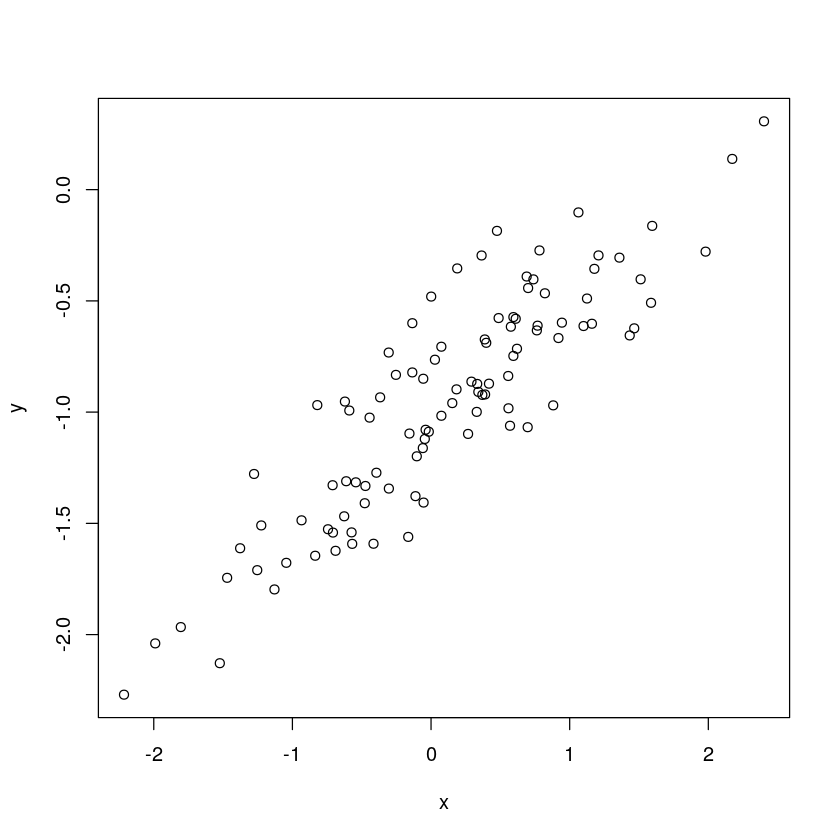

In [26]:
plot(y~x)

#### (e) Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat\beta_0$ and $\hat\beta_1$ compare to $\beta_0$ and $\beta_1$?

In [27]:
summary(model<-lm(y~x))
print("pretty close to the real values")


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46921 -0.15344 -0.03487  0.13485  0.58654 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.00942    0.02425  -41.63   <2e-16 ***
x            0.49973    0.02693   18.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2407 on 98 degrees of freedom
Multiple R-squared:  0.7784,	Adjusted R-squared:  0.7762 
F-statistic: 344.3 on 1 and 98 DF,  p-value: < 2.2e-16


[1] "pretty close to the real values"


#### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` command to create an appropriate legend.

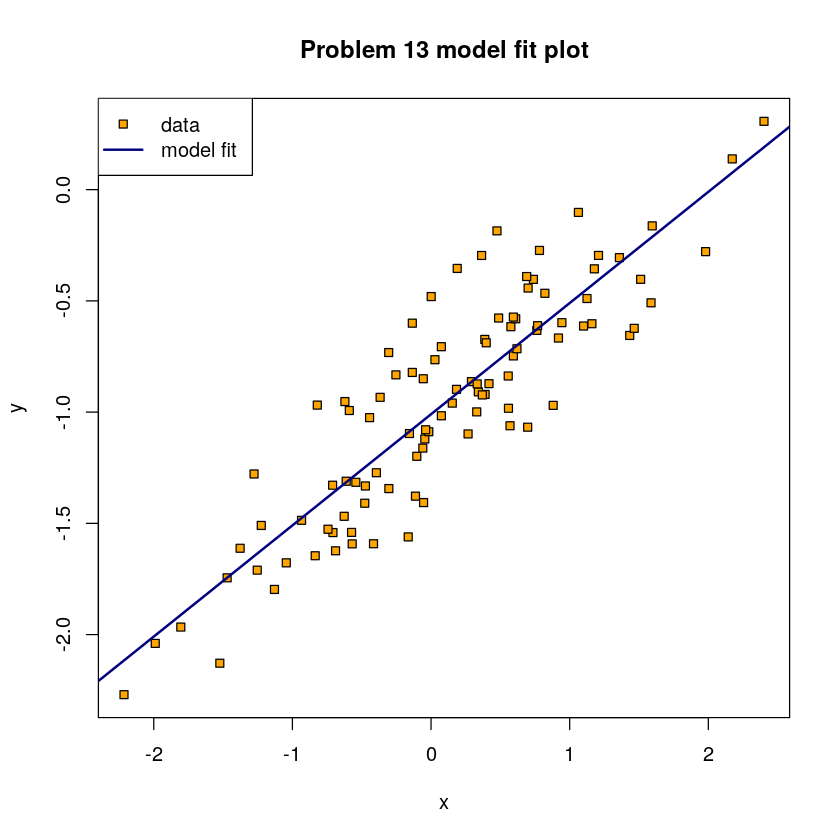

In [28]:
plot(y~x, pch=22, bg='orange', main='Problem 13 model fit plot')
abline(model, col='navyblue', lwd=2)
legend('topleft',legend=c('data','model fit'), 
       pch=c(22,NA), pt.bg=c('orange',NA), 
       lwd=c(NA,2), col=c('black','navyblue'))

#### (g) Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$ . Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [29]:
summary(lm(y~poly(x,2)))
print('Quadratic term is not significant, no significant improvement')


Call:
lm(formula = y ~ poly(x, 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4913 -0.1563 -0.0322  0.1451  0.5675 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.95501    0.02395 -39.874   <2e-16 ***
poly(x, 2)1  4.46612    0.23951  18.647   <2e-16 ***
poly(x, 2)2 -0.33602    0.23951  -1.403    0.164    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2395 on 97 degrees of freedom
Multiple R-squared:  0.7828,	Adjusted R-squared:  0.7784 
F-statistic: 174.8 on 2 and 97 DF,  p-value: < 2.2e-16


[1] "Quadratic term is not significant, no significant improvement"


#### (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is *less* noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\varepsilon$ in (b). Describe your results.


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18768 -0.06138 -0.01395  0.05394  0.23462 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.003769   0.009699  -103.5   <2e-16 ***
x            0.499894   0.010773    46.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09628 on 98 degrees of freedom
Multiple R-squared:  0.9565,	Adjusted R-squared:  0.956 
F-statistic:  2153 on 1 and 98 DF,  p-value: < 2.2e-16



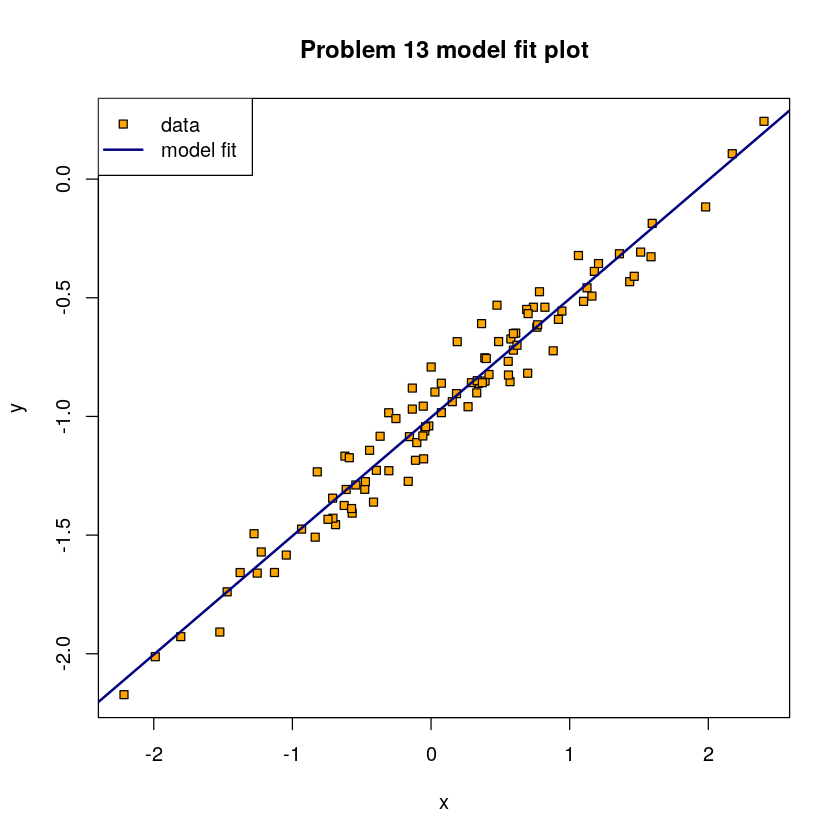

In [30]:
a_to_f <- function(sd){
    set.seed(1)
    x = rnorm(100)
    eps = rnorm(100,0,sd)
    y = -1 + 0.5*x+eps
    print(summary(model<-lm(y~x)))
    plot(y~x, pch=22, bg='orange', main='Problem 13 model fit plot')
    abline(model, col='navyblue', lwd=2)
    legend('topleft',legend=c('data','model fit'), 
           pch=c(22,NA), pt.bg=c('orange',NA), 
           lwd=c(NA,2), col=c('black','navyblue'))
}

a_to_f(.1)

#### (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is *more* noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\varepsilon$ in (b). Describe your results.


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93842 -0.30688 -0.06975  0.26970  1.17309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.01885    0.04849 -21.010  < 2e-16 ***
x            0.49947    0.05386   9.273 4.58e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4814 on 98 degrees of freedom
Multiple R-squared:  0.4674,	Adjusted R-squared:  0.4619 
F-statistic: 85.99 on 1 and 98 DF,  p-value: 4.583e-15



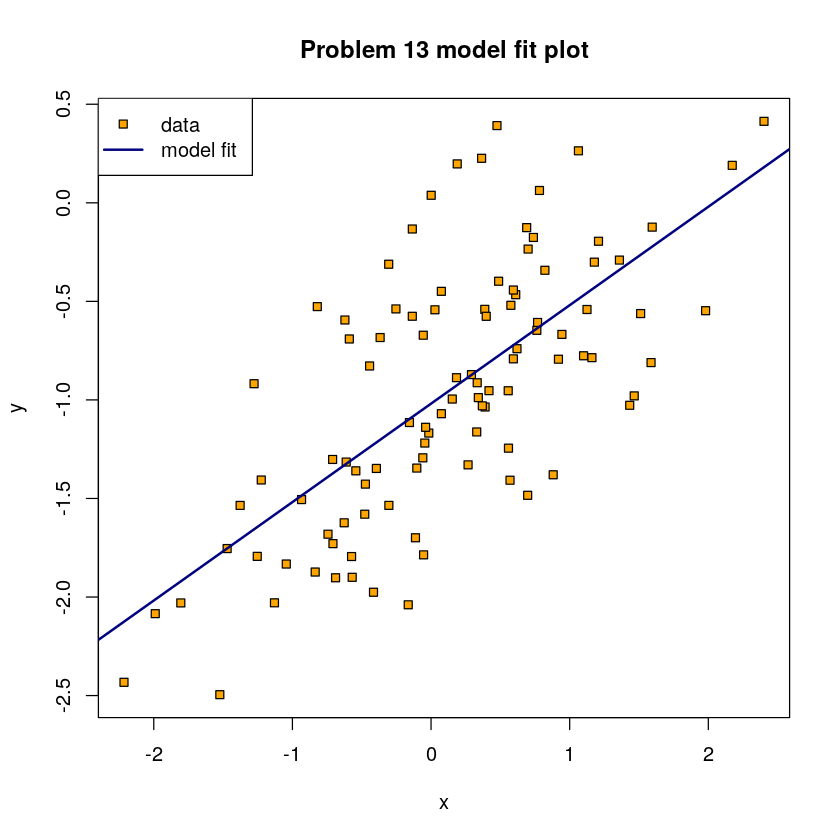

In [31]:
a_to_f(0.5)

#### (j) What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [32]:
confint(model)

,2.5 %,97.5 %
(Intercept),-1.0575402,-0.9613061
x,0.4462897,0.5531801


### 14. This problem focuses on the collinearity problem.

#### (a) Perform the following commands in `R`:
```
> set.seed(1)
> x1=runif(100)
> x2=0.5*x1+rnorm(100)/10
> y=2+2*x1+0.3*x2+rnorm(100)
```
#### The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2` . Write out the form of the linear model. What are the regression coefficients?

$$
y = \beta_0 + \beta_1~x_1+\beta_2~x_2+\varepsilon
$$
With $\beta_0 = 2$, $\beta_1 = 2$, and $\beta_2=0.3$.

In [33]:
set.seed(1)
x1=runif(100)
x2=0.5*x1+rnorm(100)/10
y=2+2*x1+0.3*x2+rnorm(100)
str(y)

 num [1:100] 3.033 2.763 2.924 2.989 0.989 ...


#### (b) What is the correlation between `x1` and `x2`? Create a scatterplot displaying the relationship between the variables.

[1] 0.8351212

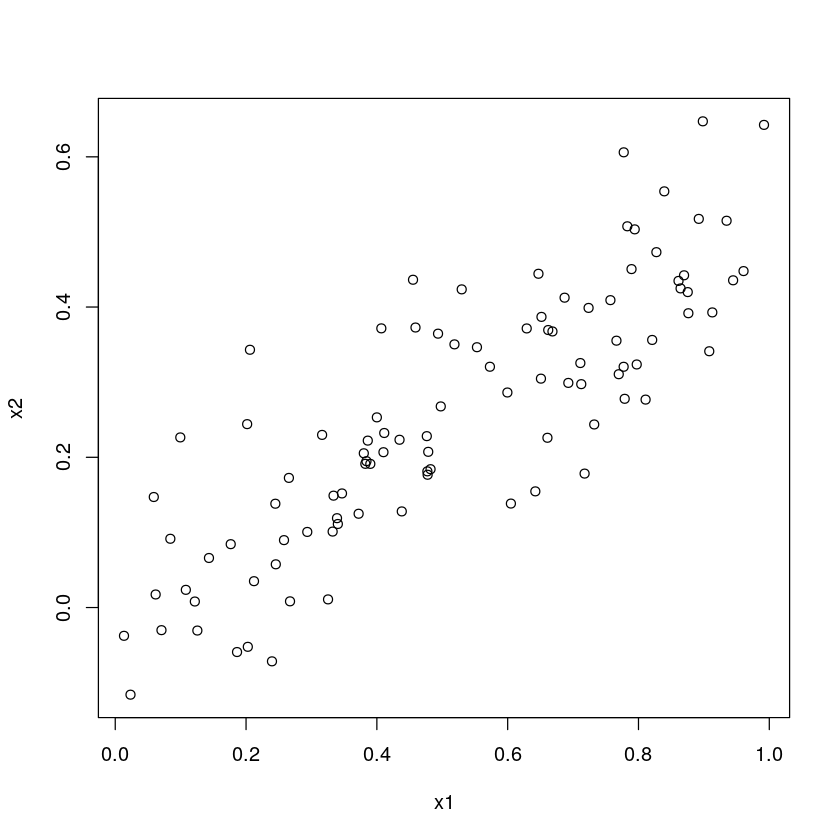

In [34]:
cor(x1,x2)
plot(x1,x2)

#### (c) Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $\hat\beta_0$, $\hat\beta_1$ , and $\hat\beta_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?

In [35]:
summary(model <- lm(y~x1+x2))
cat("Reject beta_1 = 0 but not beta_2 = 0")


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


Reject beta_1 = 0 but not beta_2 = 0

#### (d) Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [36]:
summary(model <- lm(y~x1))
cat("Reject beta_1 = 0")


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


Reject beta_1 = 0

#### (e) Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [37]:
summary(model <- lm(y~x2))
cat("Reject beta_1 = 0")


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


Reject beta_1 = 0

#### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.  

Reduced model:
\begin{align}
y &= \beta_0 + \beta_1x_1 + \beta_2x_2 + \varepsilon_y \\
y &= \beta_0 + \beta_1x_1 + \beta_2(\alpha_0 + \alpha_1x_1 + \varepsilon_x) + \varepsilon_y \\
y &= (\beta_0 + \beta_2\alpha_0) + (\beta_1 + \alpha_1\beta_2)x_1 + (\beta_2\varepsilon_x + \varepsilon_y) \\
y &= \beta_0^* + \beta_1^* x_1 + \varepsilon_y^*
\end{align}

#### (g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.
````
> x1 = c(x1, 0.1)
> x2 = c(x2, 0.8)
> y = c(y, 6)
````
#### Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 7.91e-16 ***
x1            0.5394     0.5922   0.911  0.36458    
x2            2.5146     0.8977   2.801  0.00614 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 5.564e-06

There are 2 outliers, 0 extreme outliers, and 2 leverage points.
There are 1 likely influential points, both high residual and leverage. 
New point is an outlier: TRUE 
New point is an extreme outlier: FALSE 
New point is high leverage: TRUE 
New point is likely influential: TRUE

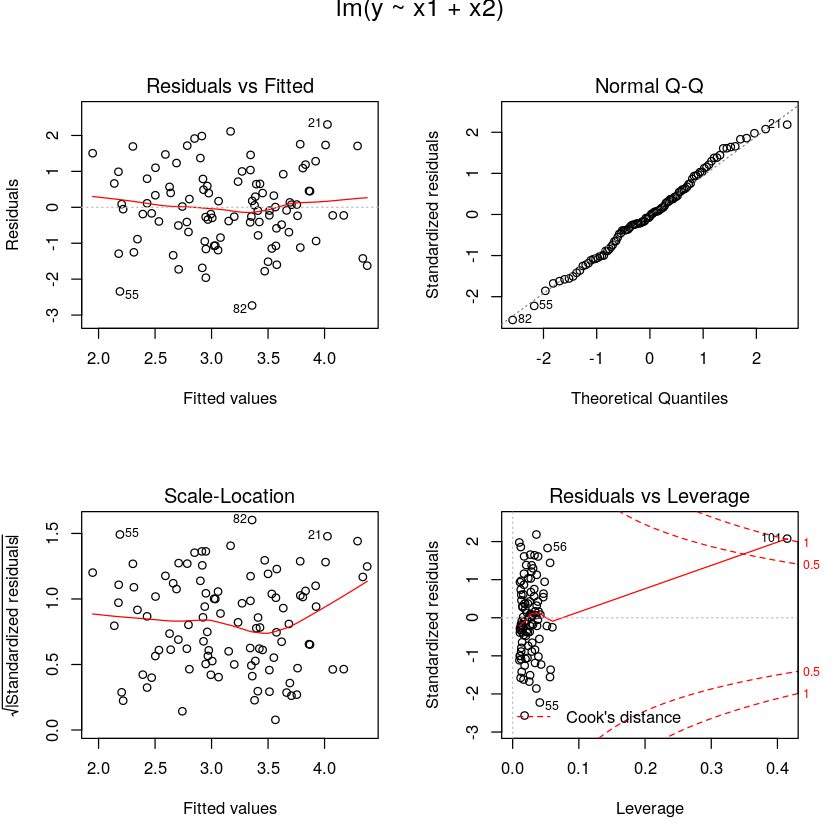

In [38]:
x1 = c(x1, 0.1)
x2 = c(x2, 0.8)
y = c(y, 6)

reportf<-function(model){
    print(summary(model))
    par(mfrow=c(2,2), oma=c(0,0,1,0))
    plot(model)
    stresid = rstandard(model)
    outl = stresid > 2
    xtout = stresid > 3
    hat = influence(model)$hat
    N = length(outl)
    leverage = hat > 2*model$rank/N
    newpoint = c(outl[N], xtout[N], leverage[N])
    cat(paste('There are',sum(outl), 'outliers,',
              sum(xtout), 'extreme outliers, and',
              sum(leverage),'leverage points.\nThere are', 
              sum(outl*leverage), 'likely influential points, both high residual and leverage.',
              '\nNew point is an outlier:', newpoint[1],
              '\nNew point is an extreme outlier:', newpoint[2],
              '\nNew point is high leverage:', newpoint[3],
              '\nNew point is likely influential:', newpoint[1]&newpoint[3]))
    }
reportf(lm(y~x1+x2))



Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 1.78e-15 ***
x1            1.7657     0.4124   4.282 4.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 4.295e-05

There are 3 outliers, 1 extreme outliers, and 3 leverage points.
There are 0 likely influential points, both high residual and leverage. 
New point is an outlier: TRUE 
New point is an extreme outlier: TRUE 
New point is high leverage: FALSE 
New point is likely influential: FALSE

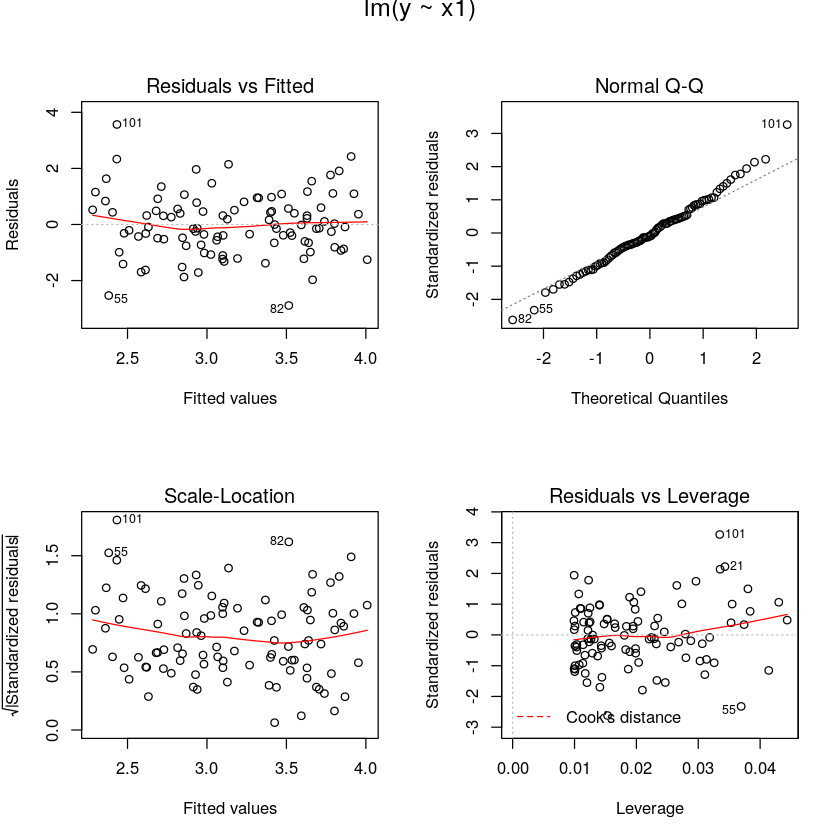

In [39]:
reportf(lm(y~x1))


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264  < 2e-16 ***
x2            3.1190     0.6040   5.164 1.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 1.253e-06

There are 1 outliers, 0 extreme outliers, and 8 leverage points.
There are 0 likely influential points, both high residual and leverage. 
New point is an outlier: FALSE 
New point is an extreme outlier: FALSE 
New point is high leverage: TRUE 
New point is likely influential: FALSE

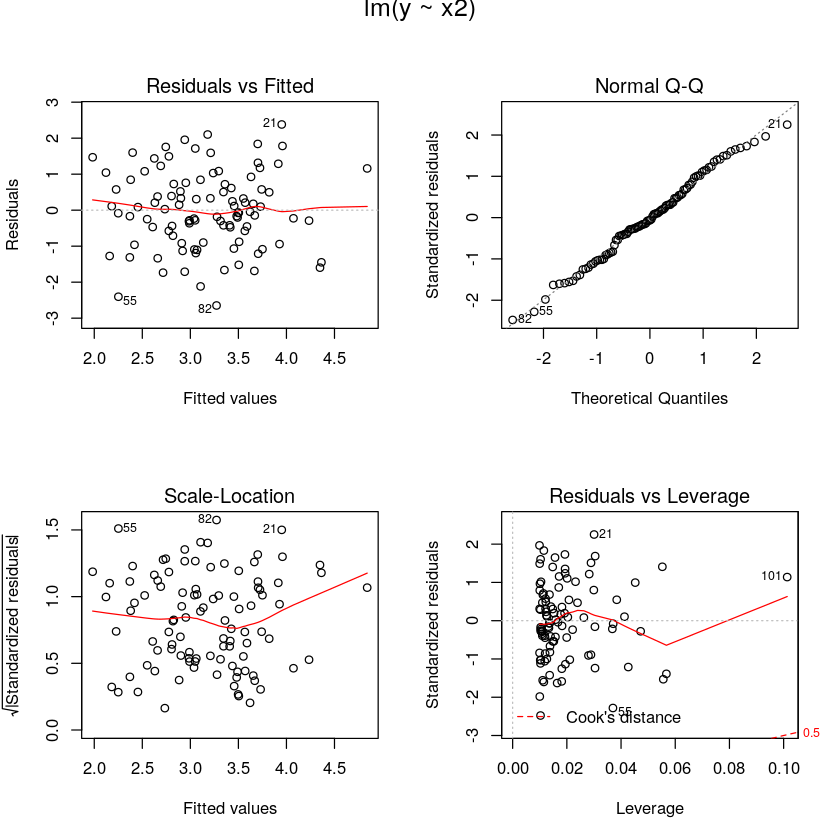

In [40]:
reportf(lm(y~x2))

### 15. This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

#### (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.


Call:
lm(formula = frml, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.957  -5.449  -2.007   2.512  29.800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.03311    0.40914   58.74   <2e-16 ***
crim        -0.41519    0.04389   -9.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.484 on 504 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.1491 
F-statistic: 89.49 on 1 and 504 DF,  p-value: < 2.2e-16


Call:
lm(formula = frml, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.918  -5.518  -1.006   2.757  29.082 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.91758    0.42474  49.248   <2e-16 ***
zn           0.14214    0.01638   8.675   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.587 on 504 degrees of freedom
Multiple R-square

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
Significant,1.0000000,1.00000,1.0000000,1.000000,1.00000,1.000000,1.0000000,1.000000,1.0000000,1.0000000,1.000000,1.00000000,1.0000000
Slope,-0.4151903,0.14214,-0.6484901,6.346157,-33.91606,9.102109,-0.1231627,1.091613,-0.4030954,-0.0255681,-2.157175,0.03359306,-0.9500494


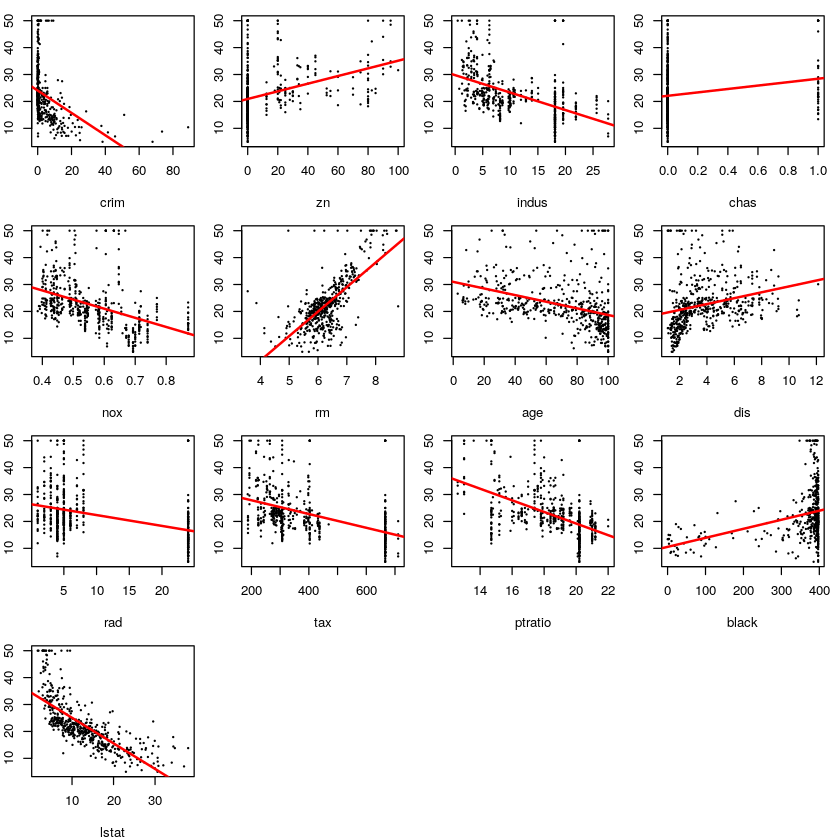

In [60]:
require(MASS) # Boston part of MASS library
predictors = names(Boston[-14])
reportf <- function(vname){
    frml = as.formula(paste0('medv~',vname))
    print(summary(model<-lm(frml, data=Boston)))
    test=confint(model)[2,]
    signif<-test[1]>0|test[2]<0 # TRUE if significant
    plot(Boston[,'medv']~Boston[,vname], ylab=NA, xlab=vname, cex=0.2)
    abline(model, col=1+signif, lwd=2) # color code for significance
    out<-c(signif, coef(model)[2])
    names(out) <- c('Significant','Slope')
    return(out)
}
par(mfrow=c(4,4), mar=c(4,2,1,1))
(slr<-vapply(predictors, reportf, c(T,1)))


(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$?

In [63]:
summary(model <- lm(medv~., data=Boston))
(signf = confint(model)[,1]>0|confint(model)[,2]<0)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

(Intercept)        crim          zn       indus        chas         nox 
       TRUE        TRUE        TRUE       FALSE        TRUE        TRUE 
         rm         age         dis         rad         tax     ptratio 
       TRUE       FALSE        TRUE        TRUE        TRUE        TRUE 
      black       lstat 
       TRUE        TRUE

#### (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

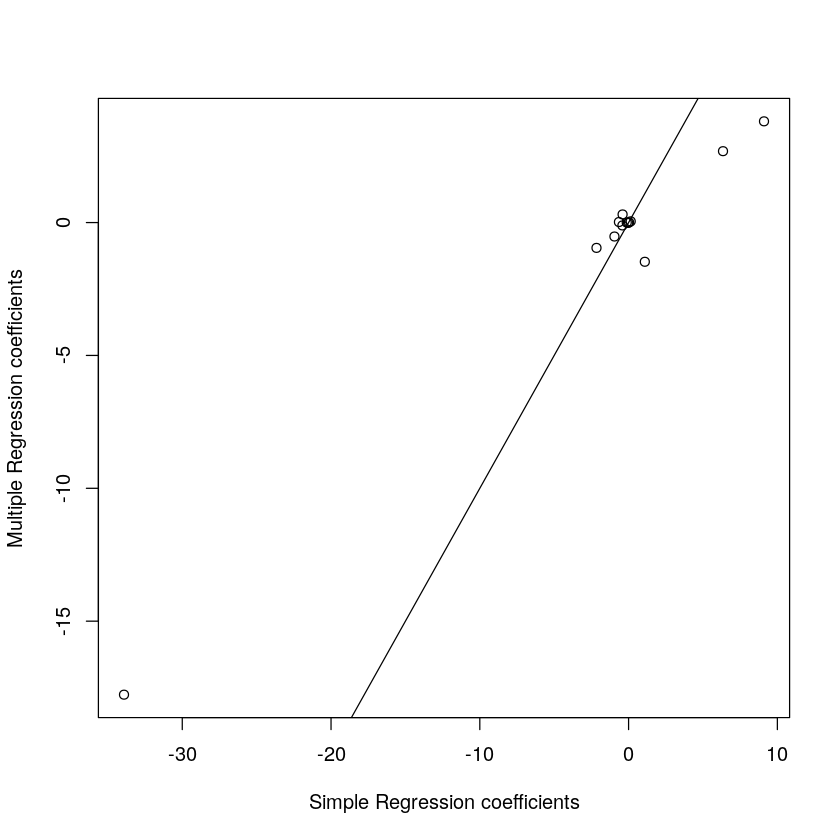

In [68]:
plot(coef(model)[-1]~slr[2,], xlab = 'Simple Regression coefficients', ylab = 'Multiple Regression coefficients')
abline(a=0, b=1)

#### (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form 
$$
Y = \beta_0 + \beta_1 X + \beta_2X^2 + \beta_3 X^3 + \varepsilon.
$$

In [83]:
reportf <- function(vname){
    if(length(unique(Boston[,vname]))<=3) return(NA)
    else{
    frml = as.formula(paste0('medv~poly(',vname,',3)'))
    print(summary(model<-lm(frml, data=Boston)))
    test=confint(model)[3:4,]
    signif<-any(test[1]>0|test[2]<0) # TRUE if significant
    out<-c(signif)
    names(out) <- c('Non_linear')
    return(out)
    }
}
(polyfit<-vapply(predictors, reportf, c(T)))


Call:
lm(formula = frml, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.983  -4.975  -1.940   2.881  33.391 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     22.5328     0.3627  62.124  < 2e-16 ***
poly(crim, 3)1 -80.2545     8.1589  -9.836  < 2e-16 ***
poly(crim, 3)2  50.2416     8.1589   6.158 1.51e-09 ***
poly(crim, 3)3 -18.2905     8.1589  -2.242   0.0254 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.159 on 502 degrees of freedom
Multiple R-squared:  0.2177,	Adjusted R-squared:  0.213 
F-statistic: 46.57 on 3 and 502 DF,  p-value: < 2.2e-16


Call:
lm(formula = frml, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.449  -5.549  -1.049   3.225  29.551 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   22.5328     0.3747  60.129  < 2e-16 ***
poly(zn, 3)1  74.4966     8.4296   8.837  < 2e-16 ***
poly(zn, 3)2 -19.25

crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
   TRUE   FALSE    TRUE      NA   FALSE    TRUE    TRUE   FALSE    TRUE    TRUE 
ptratio   black   lstat 
   TRUE    TRUE    TRUE